In [1]:
import sys
sys.path.insert(1, "../input/apxembeddings-utils/")

In [2]:
# Import the required libraries
import os
import torch
import numpy as np
import transformers
from transformers import AutoModelForSequenceClassification, GlueDataTrainingArguments, AutoTokenizer
import torchmetrics
import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm
import math

from apx import ApproxEmbed, ApxSVD, set_random_seed
from glue_score import GLUE_TASKS, make_model, Glue, plot

In [3]:
set_random_seed(255)

In [4]:
transformers.utils.logging.set_verbosity_error()
device = "cuda:0" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained('prajjwal1/bert-tiny')

epochs=5
lr=5e-5

saved_dict = torch.load('../input/pretrainedapx/results/compression_pretrained/8_8_norm.pth')

runs=["Original","Compressed Adaptive","Compressed Fixed", "Compressed SVD"]

Downloading:   0%|          | 0.00/285 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [5]:
levels = saved_dict['level']
channels = saved_dict['channel']
nn_weights = [saved_dict['apx'][p] for p in saved_dict['apx'].keys() if '.weight' in p]
nn_levels = len(nn_weights)-1
neurons=len(nn_weights[0])
embeddings_size=len(nn_weights[-1])
feats=saved_dict['apx']['B.feats']
n_embeddings=feats.shape[1]
bits = int(math.log2(saved_dict['apx']['B.dictionary'].shape[1]))

if feats is None:
    apx.fix_indices()

cola Original


Downloading:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8551 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1063 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Epoch: 5: 100%|██████████| 268/268 [00:06<00:00, 41.41it/s, loss: 0.202]


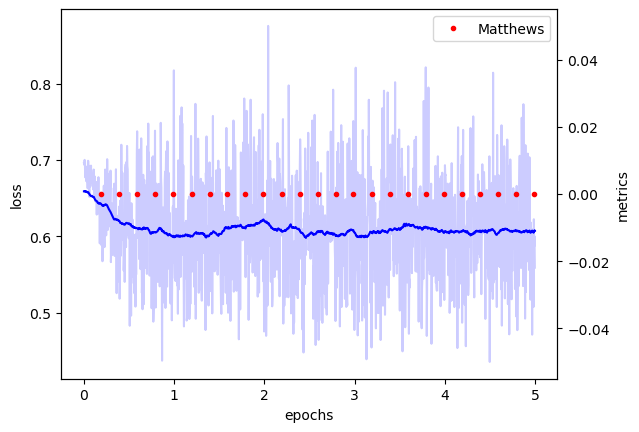

cola Compressed Adaptive


Epoch: 5: 100%|██████████| 268/268 [00:11<00:00, 24.06it/s, loss: 0.2]


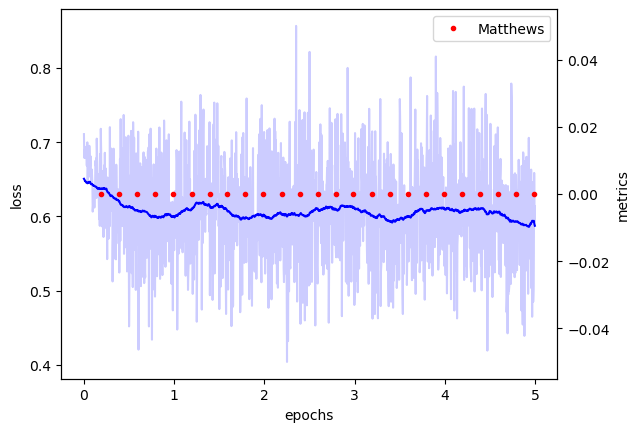

cola Compressed Fixed


Epoch: 5: 100%|██████████| 268/268 [00:07<00:00, 34.42it/s, loss: 0.202]


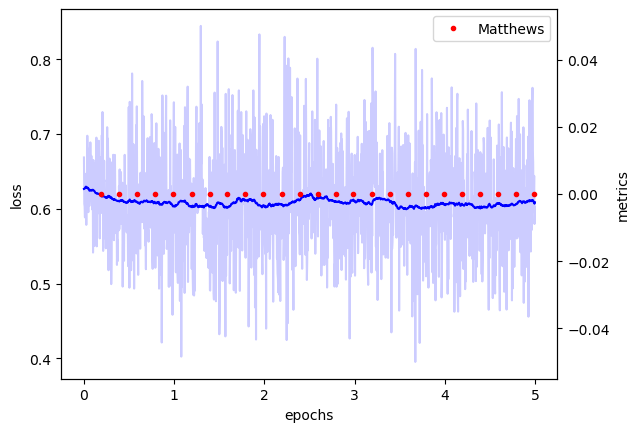

cola Compressed SVD


Epoch: 5: 100%|██████████| 268/268 [00:06<00:00, 40.83it/s, loss: 0.203]


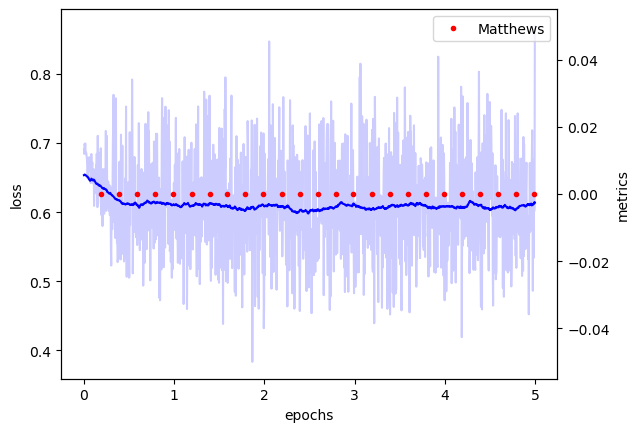

sst2 Original


Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Epoch: 5: 100%|██████████| 2105/2105 [00:47<00:00, 44.49it/s, loss: 0.0959]


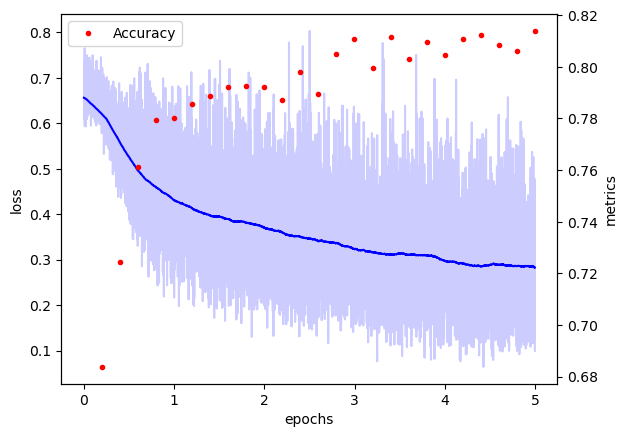

sst2 Compressed Adaptive


Epoch: 5: 100%|██████████| 2105/2105 [01:21<00:00, 25.69it/s, loss: 0.0731]


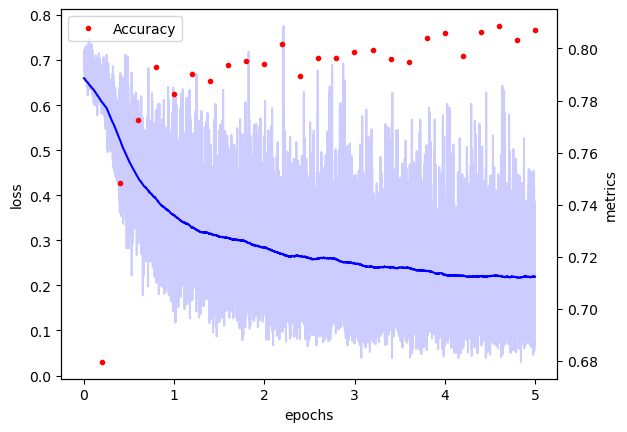

sst2 Compressed Fixed


Epoch: 5: 100%|██████████| 2105/2105 [00:51<00:00, 41.03it/s, loss: 0.153]


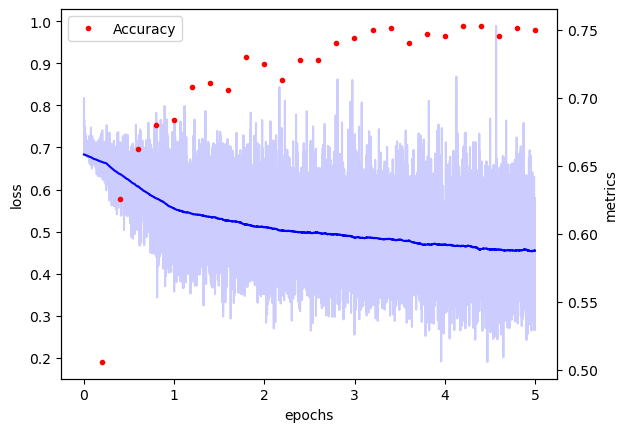

sst2 Compressed SVD


Epoch: 5: 100%|██████████| 2105/2105 [00:47<00:00, 44.27it/s, loss: 0.179]


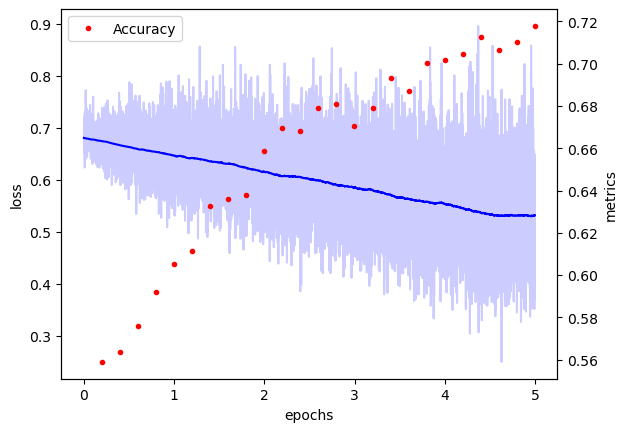

mrpc Original


Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Epoch: 5: 100%|██████████| 115/115 [00:03<00:00, 32.03it/s, loss: 0.15]


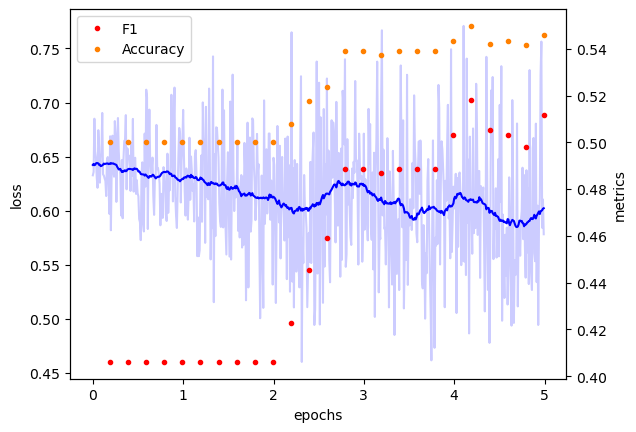

mrpc Compressed Adaptive


Epoch: 5: 100%|██████████| 115/115 [00:05<00:00, 22.92it/s, loss: 0.146]


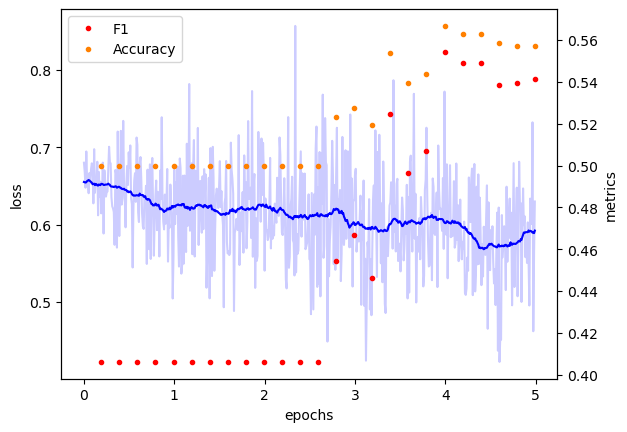

mrpc Compressed Fixed


Epoch: 5: 100%|██████████| 115/115 [00:03<00:00, 30.90it/s, loss: 0.153]


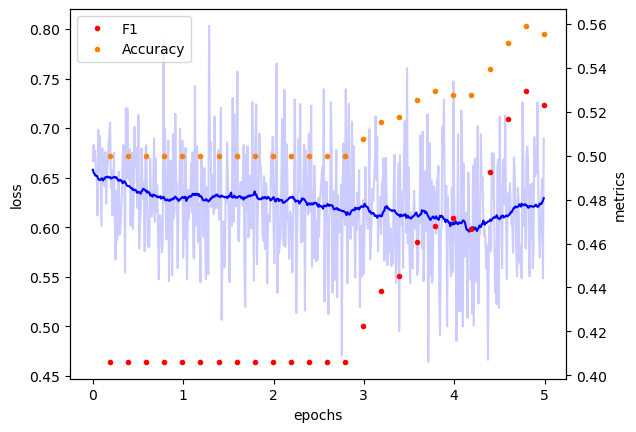

mrpc Compressed SVD


Epoch: 5: 100%|██████████| 115/115 [00:03<00:00, 33.82it/s, loss: 0.155]


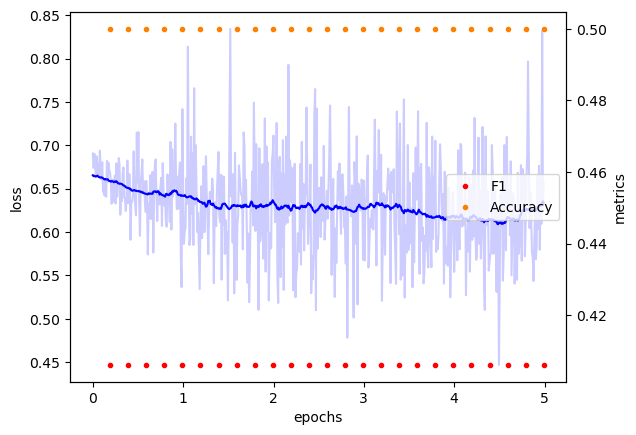

stsb Original


Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/stsb/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


/opt/conda/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Epoch: 5: 100%|██████████| 180/180 [00:06<00:00, 28.77it/s, loss: 0.434]


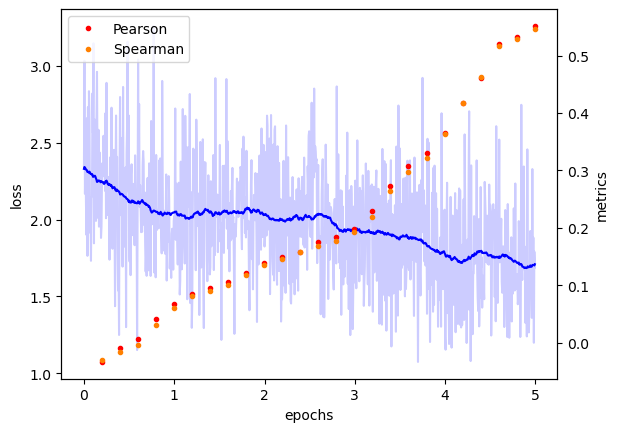

stsb Compressed Adaptive


Epoch: 5: 100%|██████████| 180/180 [00:08<00:00, 20.02it/s, loss: 0.467]


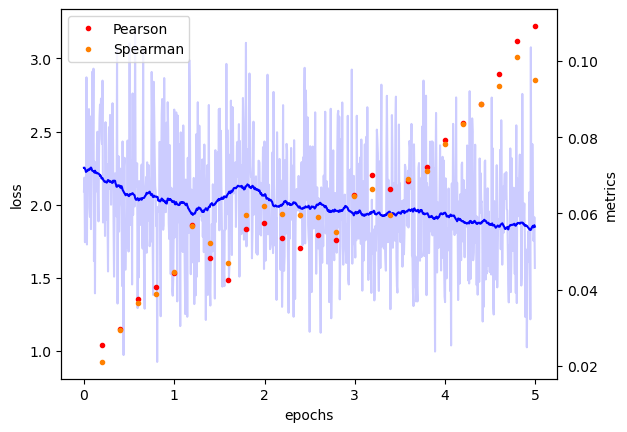

stsb Compressed Fixed


Epoch: 5: 100%|██████████| 180/180 [00:06<00:00, 29.15it/s, loss: 0.496]


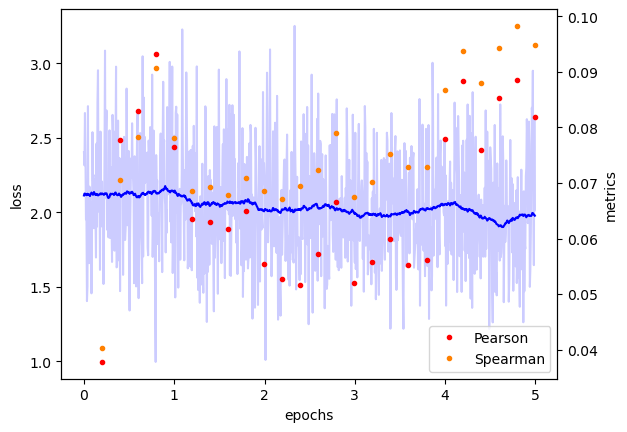

stsb Compressed SVD


Epoch: 5: 100%|██████████| 180/180 [00:05<00:00, 30.33it/s, loss: 0.507]


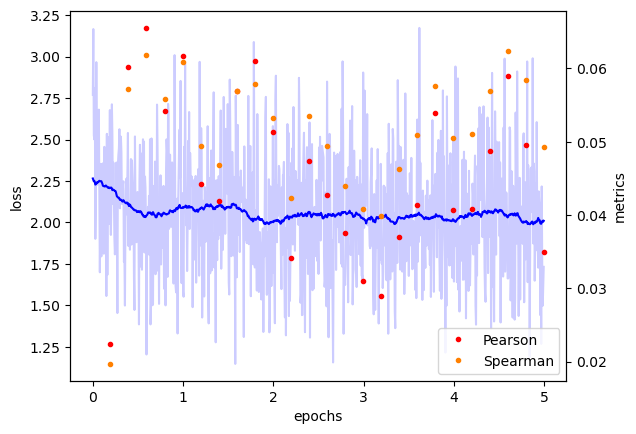

qqp Original


Generating train split:   0%|          | 0/363846 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/40430 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/390965 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/qqp/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Epoch: 5: 100%|██████████| 11371/11371 [05:18<00:00, 35.70it/s, loss: 0.0936]


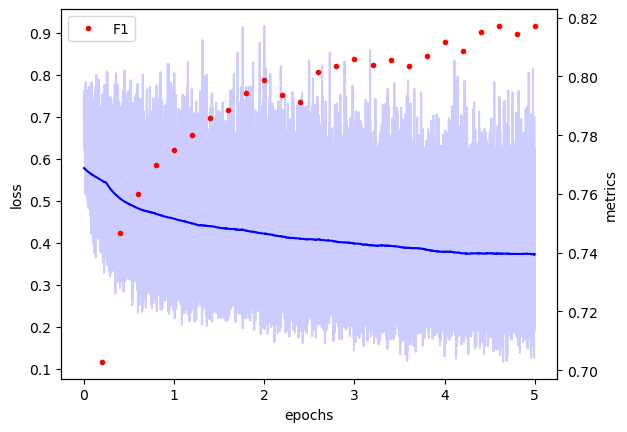

qqp Compressed Adaptive


Epoch: 5: 100%|██████████| 11371/11371 [08:14<00:00, 23.02it/s, loss: 0.0941]


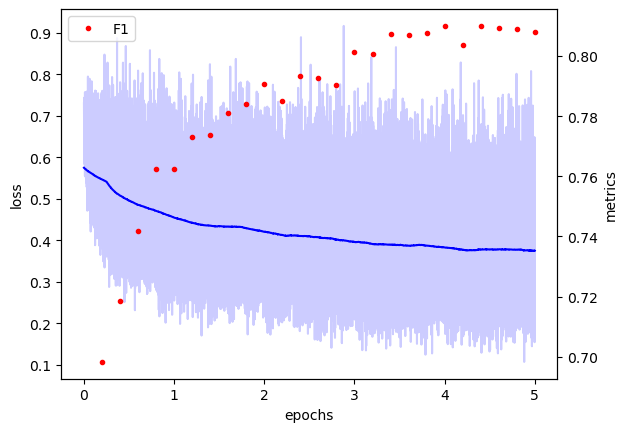

qqp Compressed Fixed


Epoch: 5: 100%|██████████| 11371/11371 [05:39<00:00, 33.47it/s, loss: 0.111]


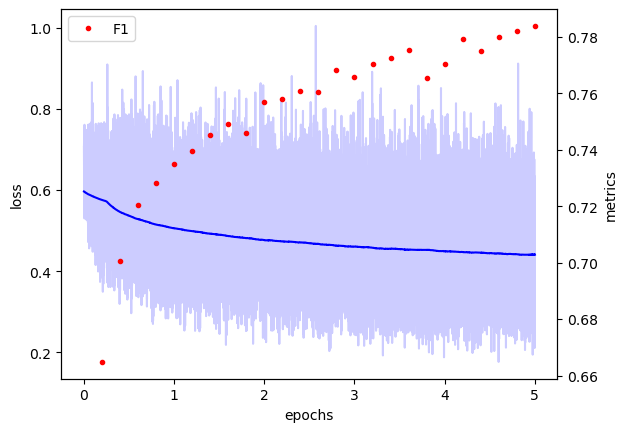

qqp Compressed SVD


Epoch: 5: 100%|██████████| 11371/11371 [05:21<00:00, 35.33it/s, loss: 0.124]


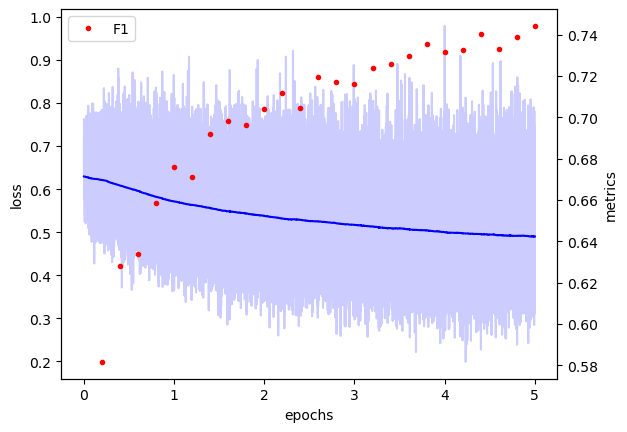

mnli Original


Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Generating validation split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9847 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mnli_mismatched/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Generating validation split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mnli_matched/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Epoch: 5: 100%|██████████| 12272/12272 [05:19<00:00, 38.42it/s, loss: 0.21]


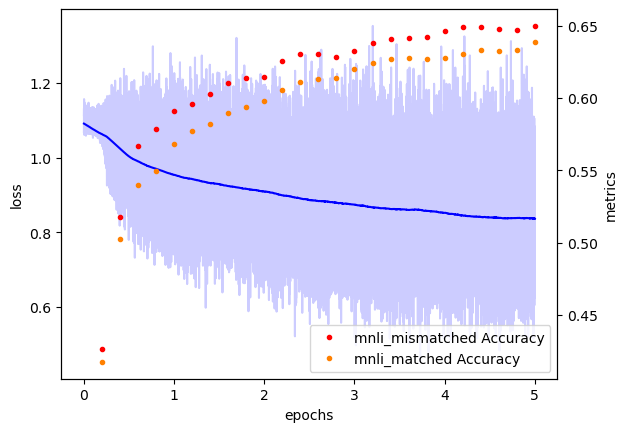

mnli Compressed Adaptive


Epoch: 5: 100%|██████████| 12272/12272 [08:31<00:00, 23.98it/s, loss: 0.211]


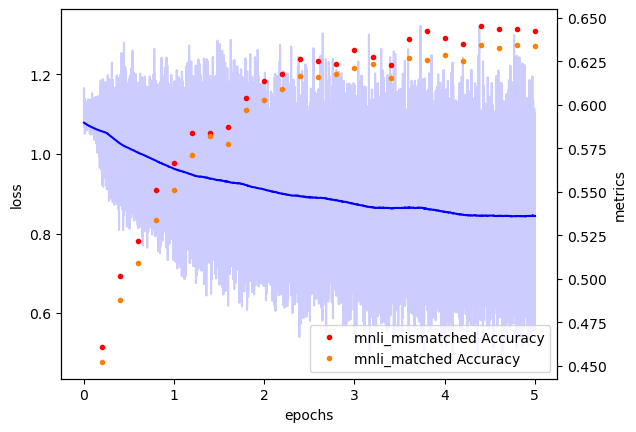

mnli Compressed Fixed


Epoch: 5: 100%|██████████| 12272/12272 [05:44<00:00, 35.64it/s, loss: 0.228]


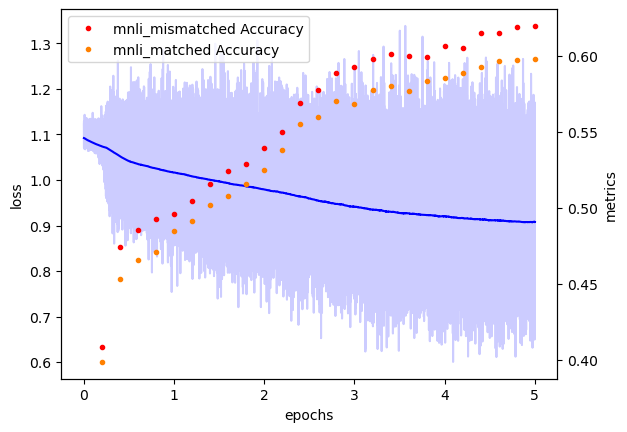

mnli Compressed SVD


Epoch: 5: 100%|██████████| 12272/12272 [05:32<00:00, 36.86it/s, loss: 0.246]


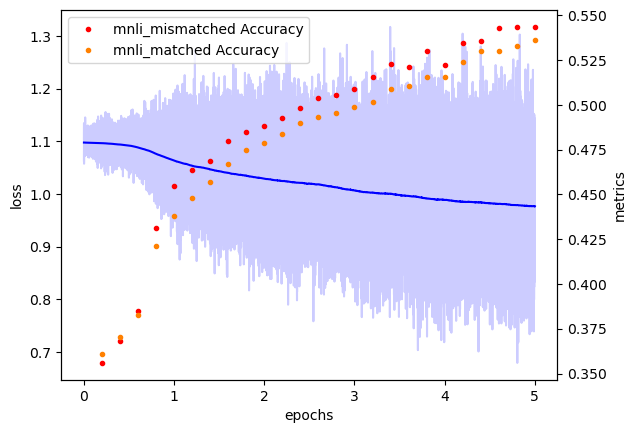

qnli Original


Generating train split:   0%|          | 0/104743 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5463 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5463 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Epoch: 5: 100%|██████████| 3274/3274 [01:39<00:00, 32.97it/s, loss: 0.131]


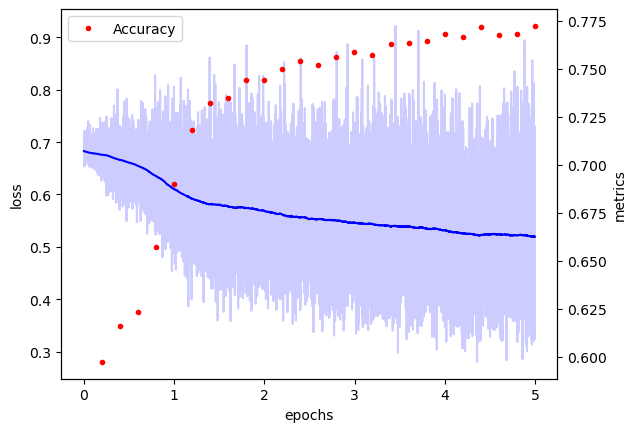

qnli Compressed Adaptive


Epoch: 5: 100%|██████████| 3274/3274 [02:21<00:00, 23.20it/s, loss: 0.124]


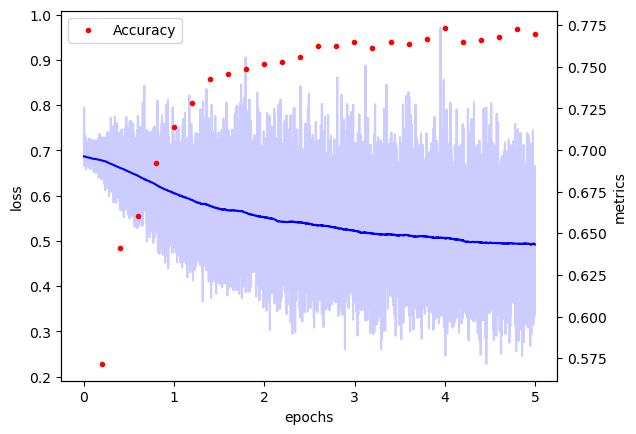

qnli Compressed Fixed


Epoch: 5: 100%|██████████| 3274/3274 [01:37<00:00, 33.55it/s, loss: 0.134]


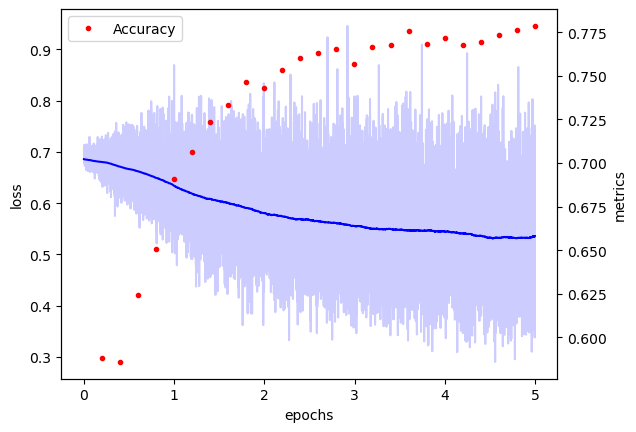

qnli Compressed SVD


Epoch: 5: 100%|██████████| 3274/3274 [01:54<00:00, 28.57it/s, loss: 0.164]


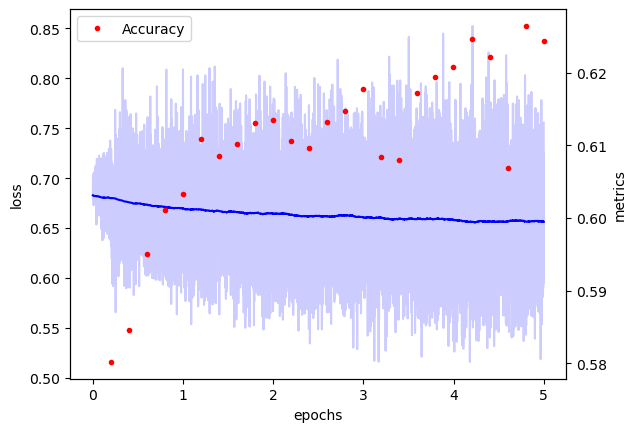

rte Original


Generating train split:   0%|          | 0/2490 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Epoch: 5: 100%|██████████| 78/78 [00:02<00:00, 29.94it/s, loss: 0.172]


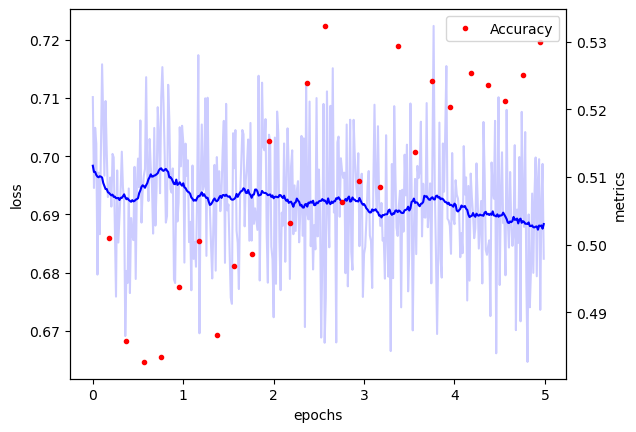

rte Compressed Adaptive


Epoch: 5: 100%|██████████| 78/78 [00:03<00:00, 20.98it/s, loss: 0.172]


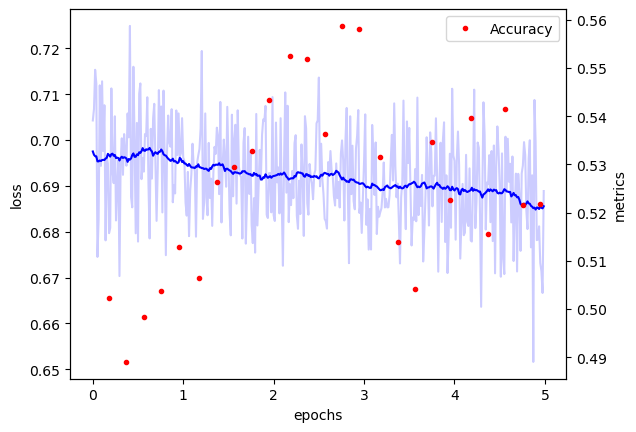

rte Compressed Fixed


Epoch: 5: 100%|██████████| 78/78 [00:03<00:00, 23.89it/s, loss: 0.173]


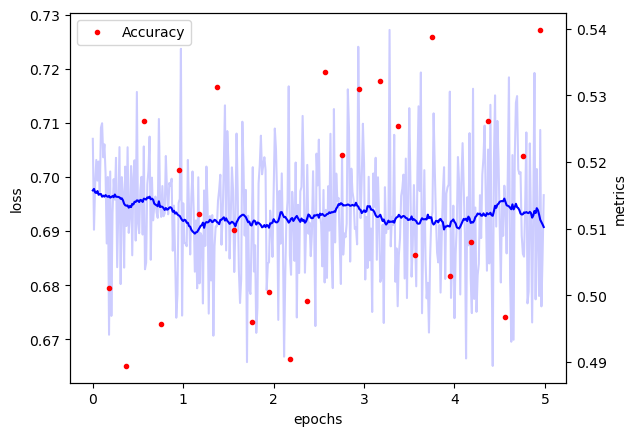

rte Compressed SVD


Epoch: 5: 100%|██████████| 78/78 [00:02<00:00, 31.21it/s, loss: 0.173]


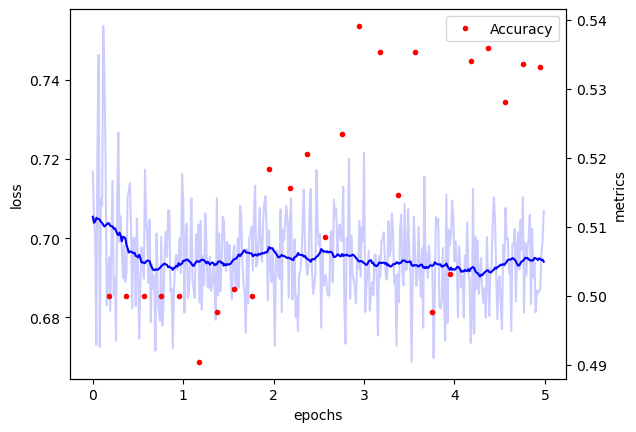

wnli Original


Generating train split:   0%|          | 0/635 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/71 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/146 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/wnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Epoch: 5: 100%|██████████| 20/20 [00:00<00:00, 33.68it/s, loss: 0.174]


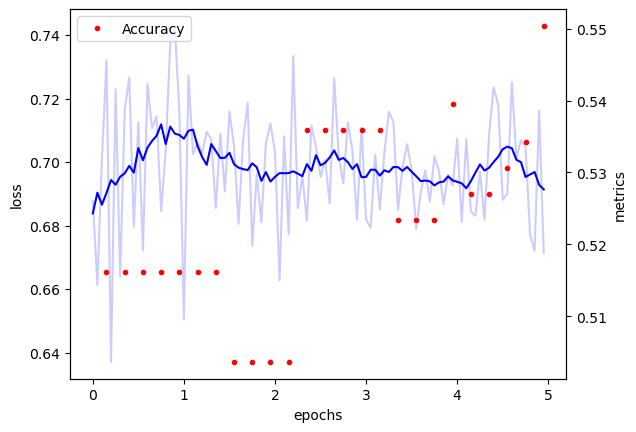

wnli Compressed Adaptive


Epoch: 5: 100%|██████████| 20/20 [00:00<00:00, 22.65it/s, loss: 0.174]


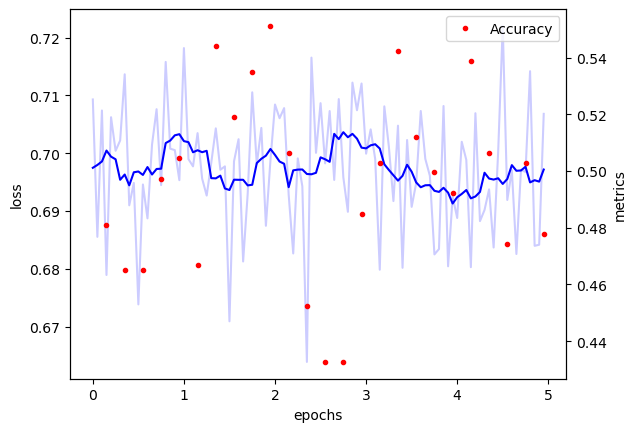

wnli Compressed Fixed


Epoch: 5: 100%|██████████| 20/20 [00:00<00:00, 32.18it/s, loss: 0.173]


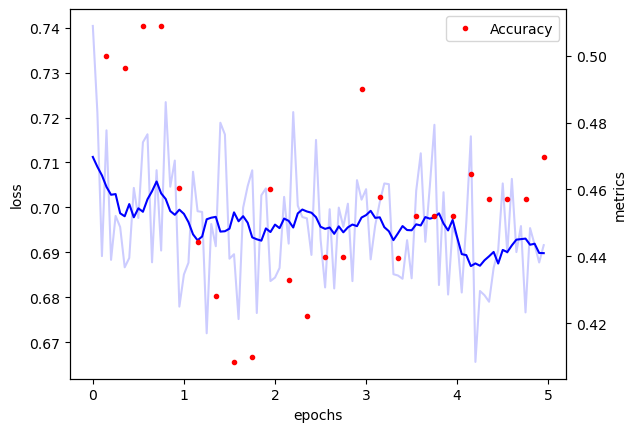

wnli Compressed SVD


Epoch: 5: 100%|██████████| 20/20 [00:00<00:00, 34.69it/s, loss: 0.173]


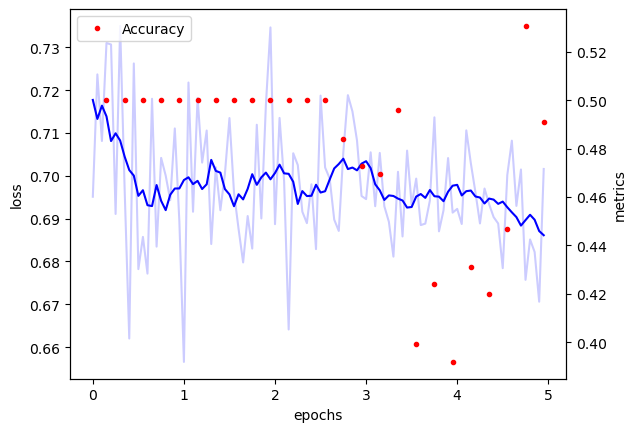

In [6]:
RESULTS={}
for task in list(GLUE_TASKS.keys()):
    results={}
    for run in runs:
        print(task,run)
        args=GLUE_TASKS[task]
        model=make_model('prajjwal1/bert-tiny',args)
        if run=="Compressed Adaptive":
            apx = ApproxEmbed(levels = levels, 
                feature_dim = channels,
                num_words = n_embeddings,
                output_dims = embeddings_size,
                feature_std = 0.1,
                feature_bias = 0.0,
                codebook_bitwidth=bits,
                neurons = neurons,
                nn_levels = nn_levels)
            apx.load_state_dict(saved_dict['apx'])
            model.bert.embeddings.word_embeddings = apx.to('cuda')
        elif run=="Compressed Fixed":
            apx = ApproxEmbed(levels = levels, 
                feature_dim = channels,
                num_words = n_embeddings,
                output_dims = embeddings_size,
                feature_std = 0.1,
                feature_bias = 0.0,
                codebook_bitwidth=bits,
                neurons = neurons,
                nn_levels = nn_levels)
            apx.load_state_dict(saved_dict['apx'])
            apx.fix_indices()
            model.bert.embeddings.word_embeddings = apx.to('cuda')
        elif run=="Compressed SVD":
            apxSVD = ApxSVD(model.bert.embeddings.word_embeddings.weight, 5)
            model.bert.embeddings.word_embeddings = apxSVD.to('cuda')
        elif run!="Original":
            raise Exception("Unknown model")
        H,V = Glue(model, tokenizer, task, args, epochs=epochs, steps_validate=0.2)
        plot(H,V)
        results[run]={'history':H,'validation':V}
    RESULTS[task]=results

In [7]:
save_path='results/'
import os
if not os.path.exists(save_path):
    os.makedirs(save_path)

torch.save(RESULTS, save_path+'glue_results_retrain.pth')

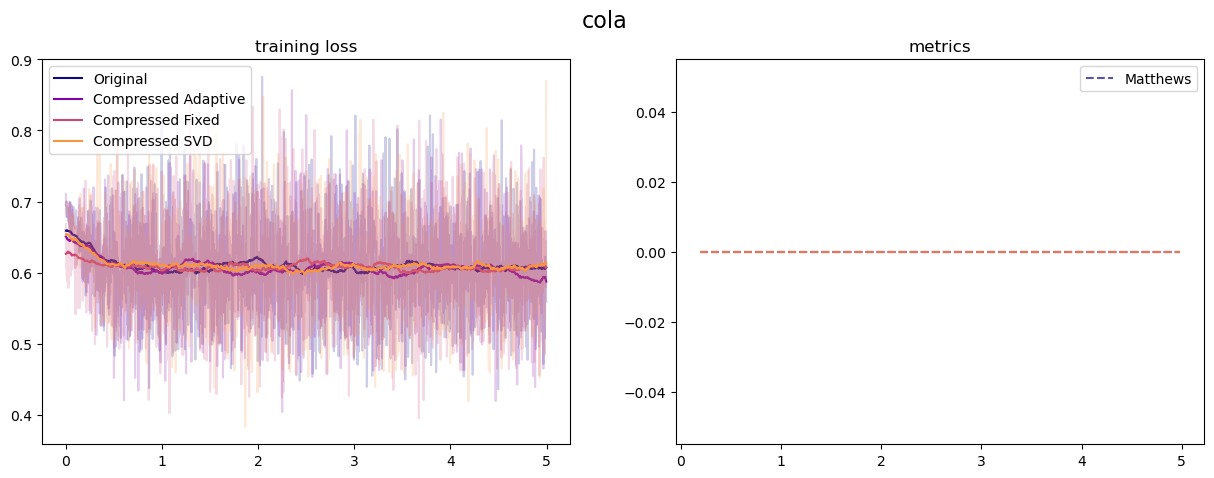

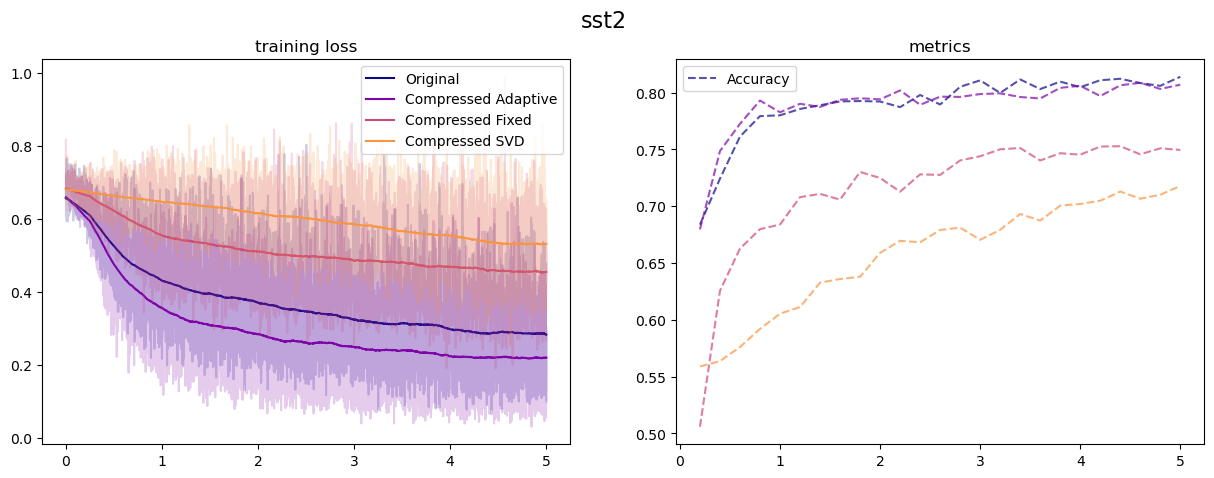

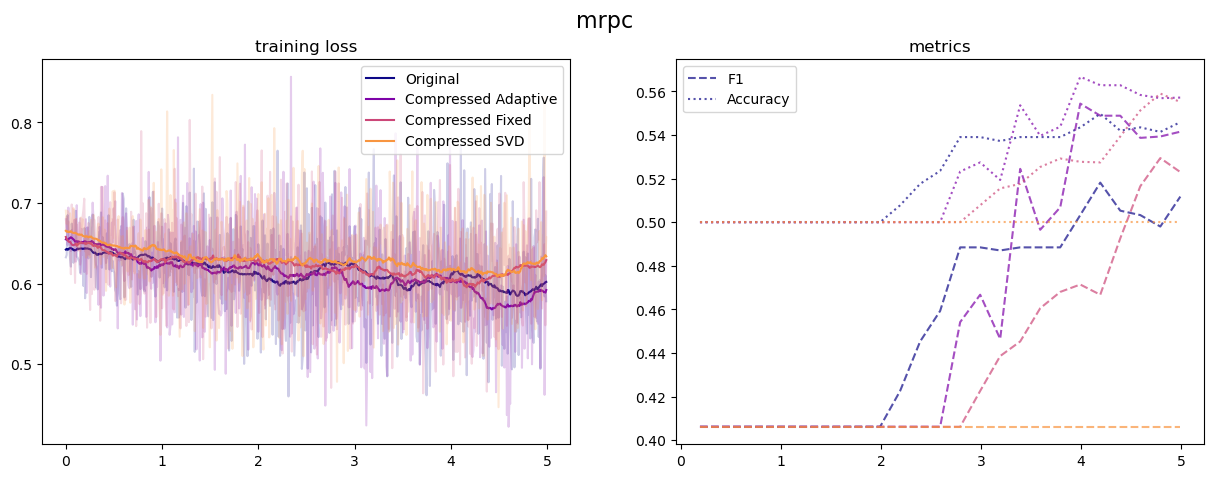

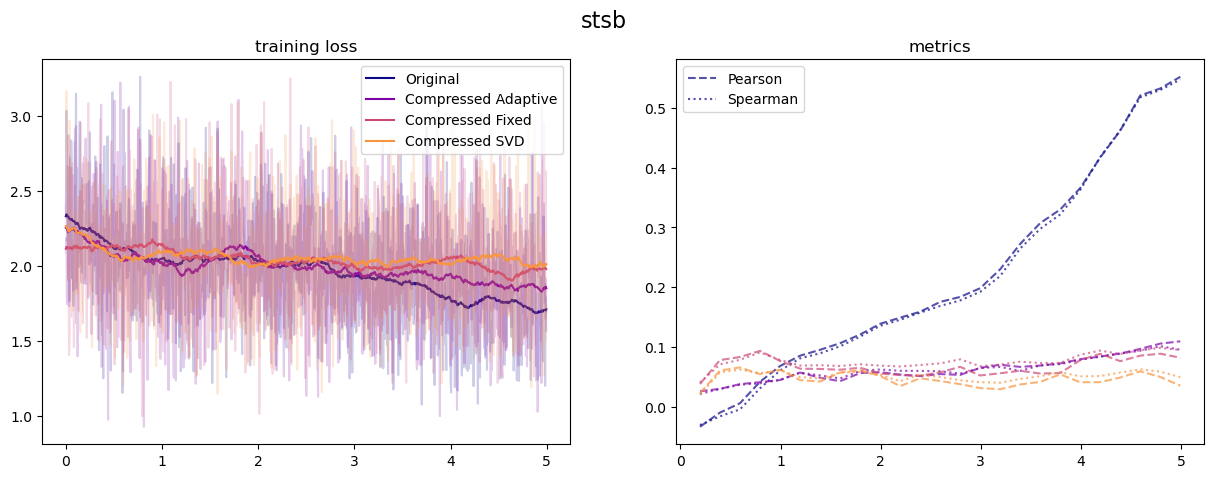

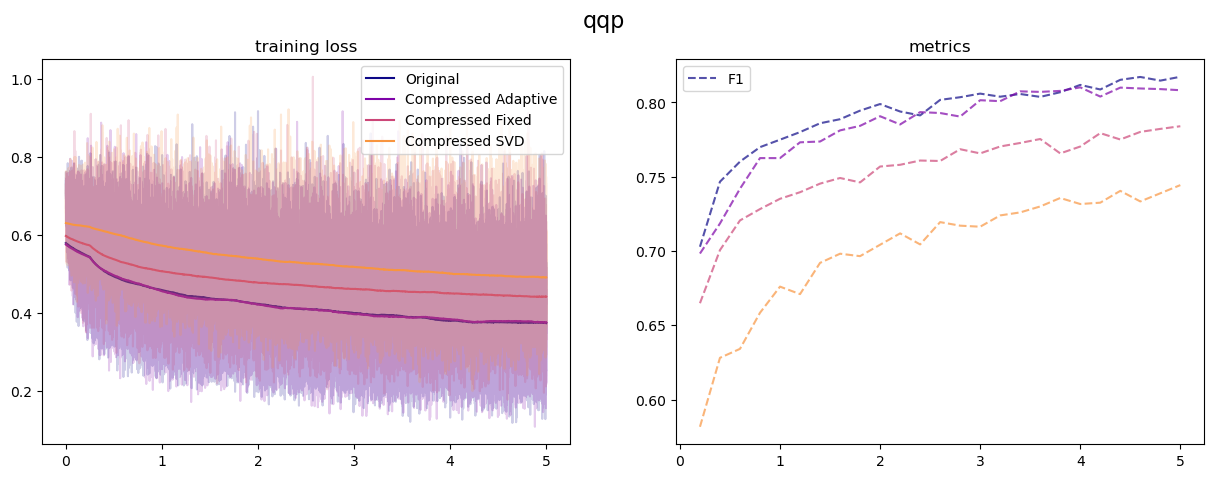

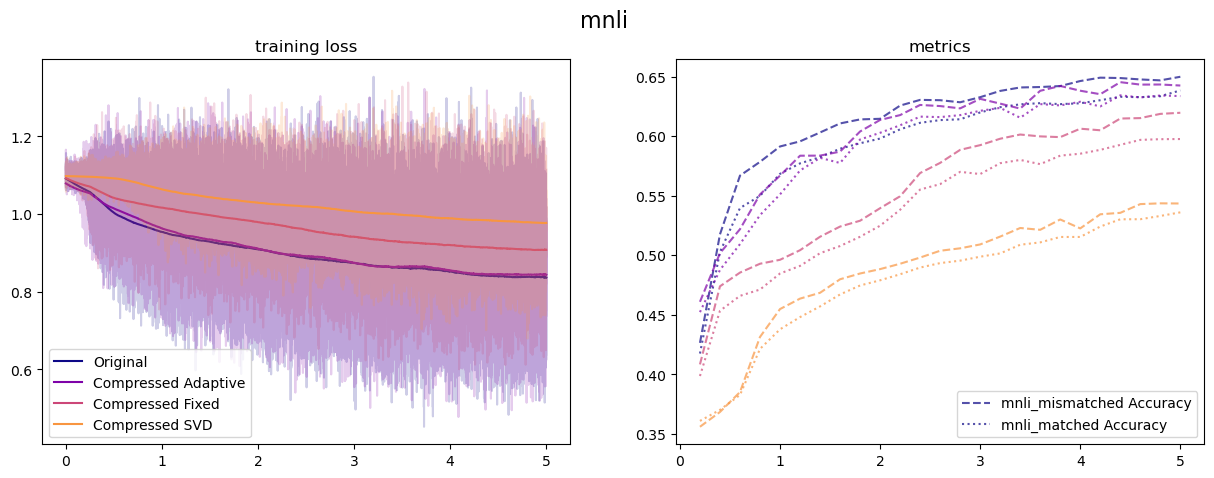

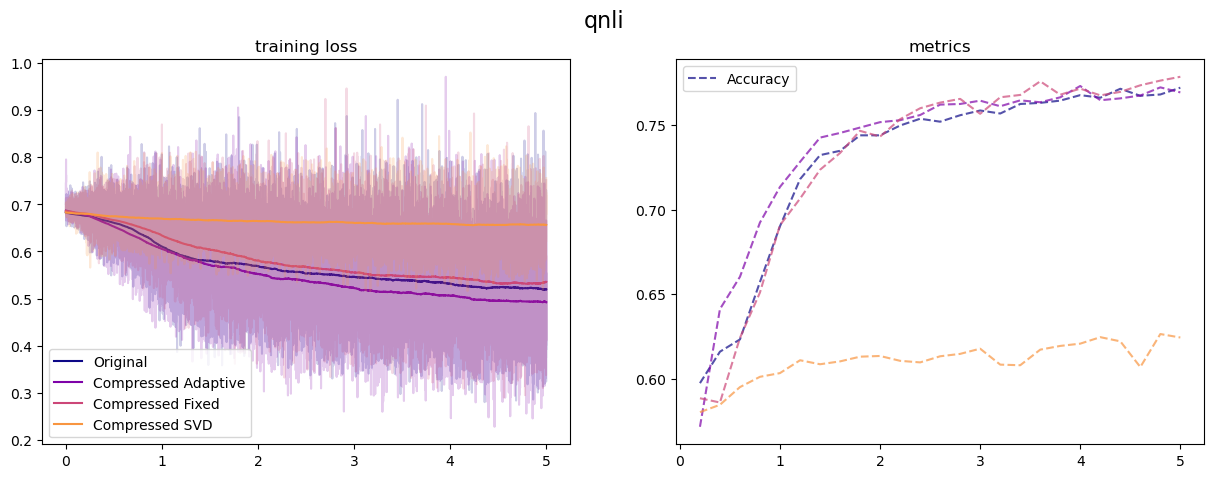

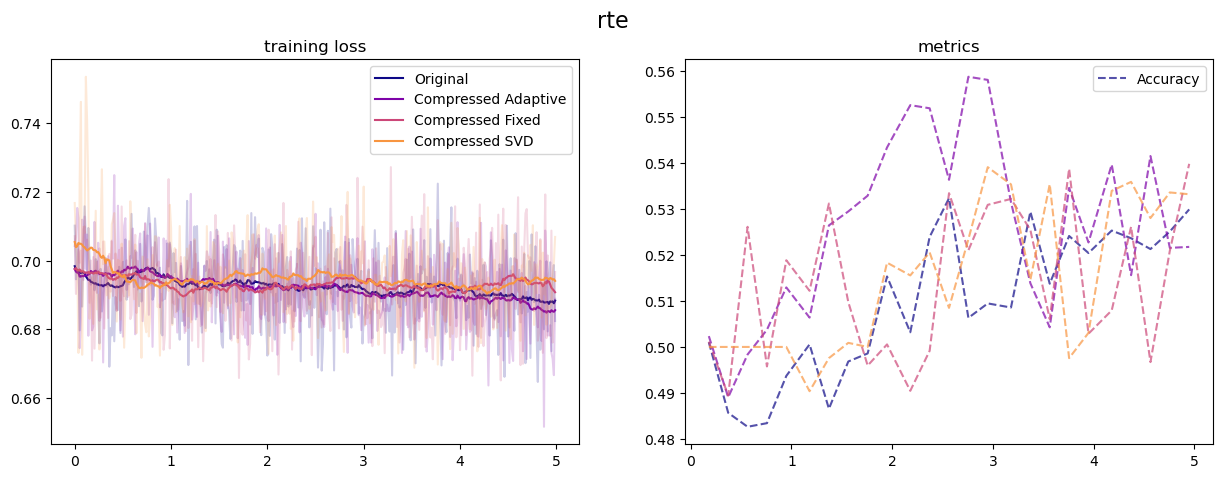

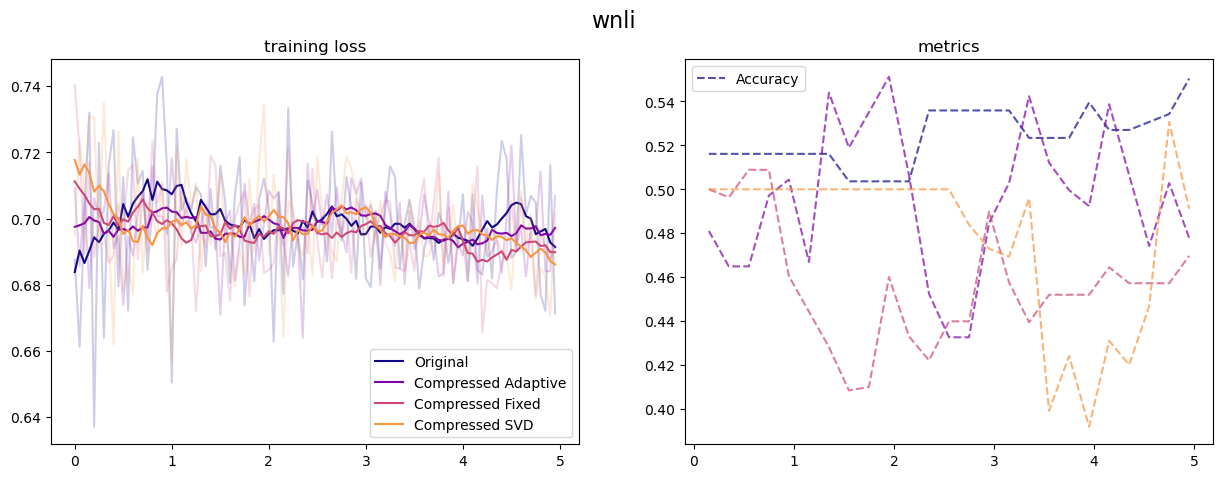

In [8]:
from glue_score import plot_results_retrain
import torch

run_dict=torch.load(save_path+'glue_results_retrain.pth')
plot_results_retrain(run_dict)